# Зависимость цен подержанных автомобилей от их характеристик


Проект выполняют: Агабалян Артём, Бондаренко Михаил, Гаврин Глеб.



Мы исследуем влияние характеристик подержанных автомобилей на цены их продажи.



Все данные были взяты с сайта kaggle.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import openpyxl


## Сбор данных 

In [82]:
df = pd.read_excel('Dataset.xlsx')

In [83]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,2024-04-23 00:00:00,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,2024-07-17 00:00:00,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,2024-01-16 00:00:00,1298.0,88.2,5.0


Мы обнаружили в датасете странный столбец mileage, по сути дублирующий столбец km_driven, и решили удалить его.

In [84]:
df.drop('mileage(km/ltr/kg)', axis=1, inplace=True)

В исходном датасете цена указывалась в рупиях. Переведём её в доллары.

In [85]:
df['selling_price'] = df['selling_price'].apply(lambda x: x * 0.011989)

In [86]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,5395.050,145500,Diesel,Individual,Manual,First Owner,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,4435.930,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,1894.262,140000,Petrol,Individual,Manual,Third Owner,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,2697.525,127000,Diesel,Individual,Manual,First Owner,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,1558.570,120000,Petrol,Individual,Manual,First Owner,1298.0,88.2,5.0


## Описание данных

Датасет, который мы будем анализировать, выглядит так:

In [87]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,5395.050,145500,Diesel,Individual,Manual,First Owner,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,4435.930,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,1894.262,140000,Petrol,Individual,Manual,Third Owner,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,2697.525,127000,Diesel,Individual,Manual,First Owner,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,1558.570,120000,Petrol,Individual,Manual,First Owner,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,3836.480,110000,Petrol,Individual,Manual,First Owner,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,1618.515,119000,Diesel,Individual,Manual,Fourth & Above Owner,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,4579.798,120000,Diesel,Individual,Manual,First Owner,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,3476.810,25000,Diesel,Individual,Manual,First Owner,1396.0,70,5.0


**- name** - модель автомобиля


**- year** - год выпуска


**- km_driven** - пробег в км


**- fuel** - тип топлива


**- seller_type** - продавец(физическое лицо/автодилер)


**- transmission** - система(автомат/механика)


**- owner** - количество владельцев до последней продажи


**- engine** - объём двигателя


**- max_power** - количество лошадиных сил


**- seats** - количество посадочных мест

In [88]:
df.shape

(8128, 11)

### Обработка пропусков

Посмотрим на пропуски в данных:

In [89]:
df.isnull().mean()

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
engine           0.027190
max_power        0.026452
seats            0.027190
dtype: float64

Пропусков в данных мало, поэтому поработаем с ними в индивидуальном порядке.

Заметим, что в большинстве случаев у представленных машин 5 посадочных мест, поэтому пропуски в столбце seats мы решили заменить на моду, то есть 5.

In [90]:
df['seats'] = df['seats'].fillna(float(5))

В столбцах engine и max_power мы решили заменить пропуски на медианные значения. Так как пропусков мало, это не должно сильно исказить анализ.

В столбце max_power встретился пропуск типа ' ', заменим его на медиану

In [91]:
df.loc[df["max_power"] == " ", "max_power"] = 85

In [92]:
df['max_power'] = df['max_power'].fillna(df['max_power'].median())

In [93]:
df['max_power'] = df['max_power'].astype(float)

In [94]:
df['engine'] = df['engine'].fillna(df['engine'].median())

In [95]:
df.isnull().mean()

name             0.0
year             0.0
selling_price    0.0
km_driven        0.0
fuel             0.0
seller_type      0.0
transmission     0.0
owner            0.0
engine           0.0
max_power        0.0
seats            0.0
dtype: float64

Теперь пропусков нет

## EDA

Начнём с самого поверхностного анализа: посмотрим на графики зависимостей между признаками, целевой переменной.

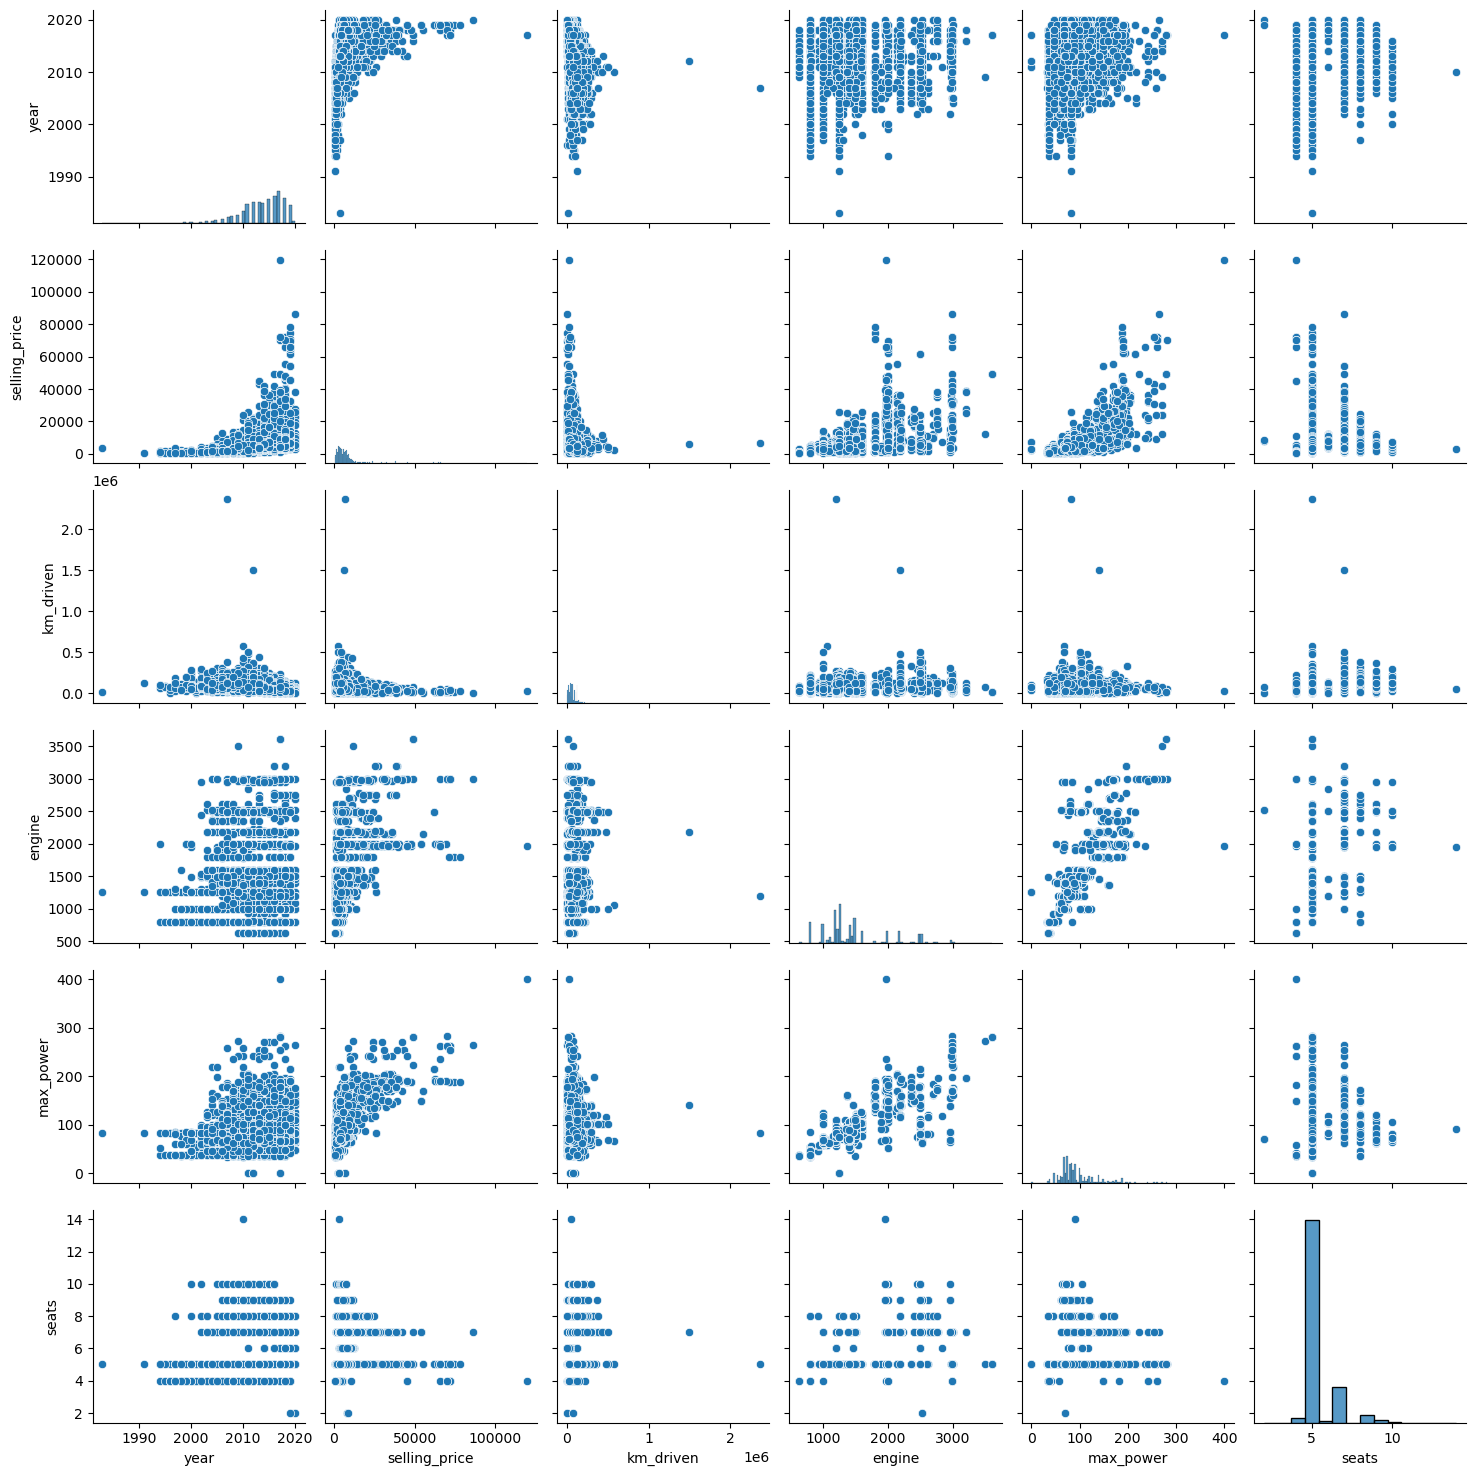

In [96]:
sns.pairplot(df)

Здесь каких-то значимых для анализа закономерностей выявить не удалось, поэтому мы решили детальнее изучить характеристики автомобилей.

### Выбросы

Построим ящики с усами, чтобы понять, есть ли у нас выбросы или наши данные однородны

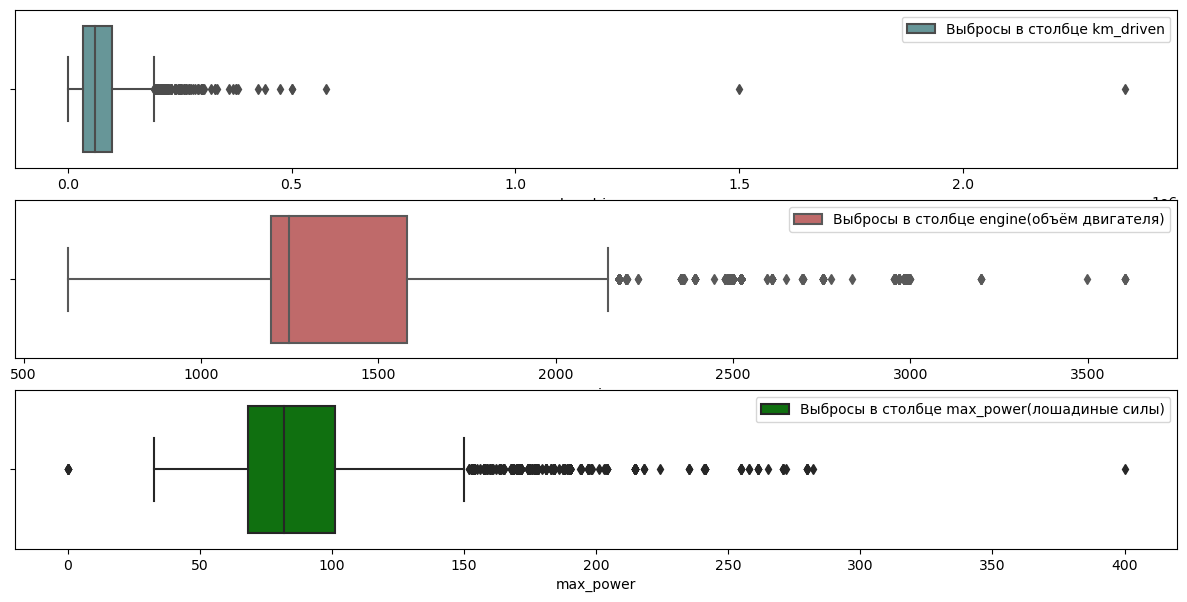

In [97]:
fig, axs = plt.subplots(3,1, figsize = (15, 7), sharey=True)
hist_1 = sns.boxplot(data=df, x="km_driven", color = 'cadetblue', ax = axs[0])
hist_1.legend(['Выбросы в столбце km_driven'])
hist_2 = sns.boxplot(data = df, x ="engine", color = "indianred",ax = axs[1])
hist_2.legend(['Выбросы в столбце engine(объём двигателя)'])
hist_3 = sns.boxplot(data = df, x ="max_power", color = "green",ax = axs[2])
hist_3.legend(['Выбросы в столбце max_power(лошадиные силы)'])
plt.show()

Заметим, что в данных заметны выбросы и ассимметрия(в max_power и km_driven).

Ассимметрия в km_driven объясняется тем, что это поддержанные автомобили и они редко продаются с маленьким пробегом.

Boxplot km_driven сильно сжат, это говорит, что в этих данных(пробег) небольшая дисперсия.

Избавимся от выбросов с помощью расчета **интерквартильного размаха**

In [98]:
q1_km = df['km_driven'].quantile(0.25)
q3_km = df['km_driven'].quantile(0.75)
IQR_km = q3_km - q1_km
low_km = q1_km - 1.5 * IQR_km
up_km = q3_km + 1.5 * IQR_km

df = df[(df['km_driven'] >= low_km) & (df['km_driven'] <= up_km)]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,5395.050,145500,Diesel,Individual,Manual,First Owner,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,4435.930,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,1894.262,140000,Petrol,Individual,Manual,Third Owner,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,2697.525,127000,Diesel,Individual,Manual,First Owner,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,1558.570,120000,Petrol,Individual,Manual,First Owner,1298.0,88.20,5.0


In [99]:
q1_engine = df['engine'].quantile(0.25)
q3_engine = df['engine'].quantile(0.75)
IQR_engine = q3_engine - q1_engine
low_engine = q1_engine - 1.5 * IQR_engine
up_engine = q3_engine + 1.5 * IQR_engine

df = df[(df['engine'] >= low_engine) & (df['engine'] <= up_engine)]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,5395.050,145500,Diesel,Individual,Manual,First Owner,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,4435.930,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,1894.262,140000,Petrol,Individual,Manual,Third Owner,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,2697.525,127000,Diesel,Individual,Manual,First Owner,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,1558.570,120000,Petrol,Individual,Manual,First Owner,1298.0,88.20,5.0


In [100]:
q1_power = df['max_power'].quantile(0.25)
q3_power = df['max_power'].quantile(0.75)
IQR_power = q3_power - q1_power
low_power = q1_power - 1.5 * IQR_power
up_power = q3_power + 1.5 * IQR_power

df = df[(df['max_power'] >= low_power) & (df['max_power'] <= up_power)]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,5395.050,145500,Diesel,Individual,Manual,First Owner,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,4435.930,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,1894.262,140000,Petrol,Individual,Manual,Third Owner,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,2697.525,127000,Diesel,Individual,Manual,First Owner,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,1558.570,120000,Petrol,Individual,Manual,First Owner,1298.0,88.20,5.0


In [101]:
df.shape

(6081, 11)

Построим те же boxplots уже с очищенными от выбросов данными

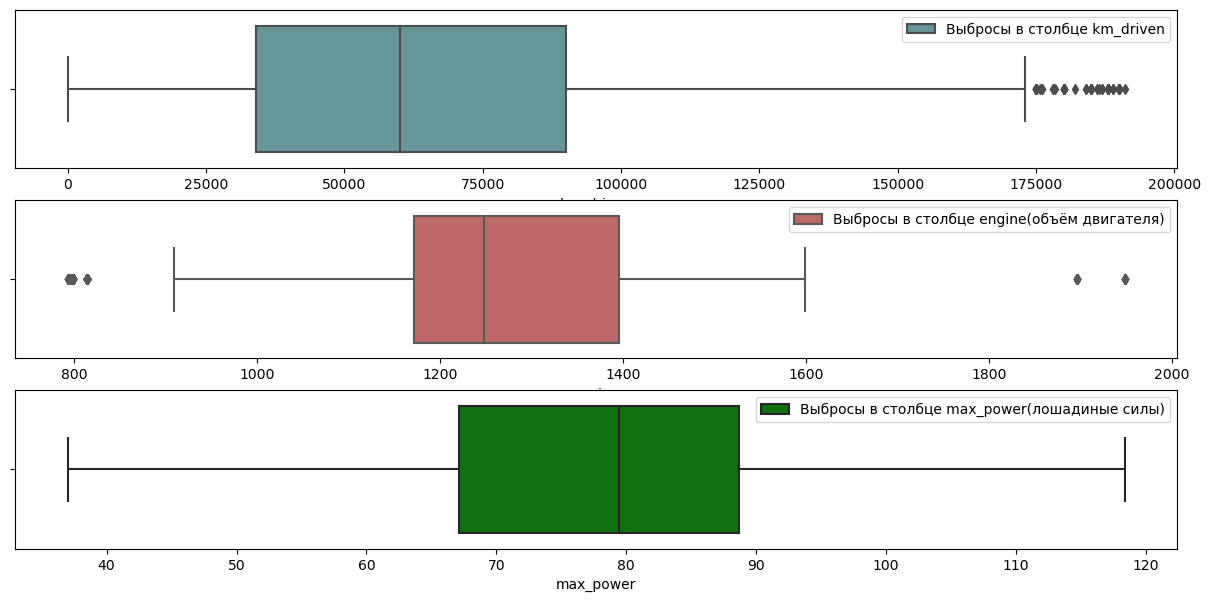

In [102]:
fig, axs = plt.subplots(3,1, figsize = (15, 7), sharey=True)
hist_1 = sns.boxplot(data=df, x="km_driven", color = 'cadetblue', ax = axs[0])
hist_1.legend(['Выбросы в столбце km_driven'])
hist_2 = sns.boxplot(data = df, x ="engine", color = "indianred",ax = axs[1])
hist_2.legend(['Выбросы в столбце engine(объём двигателя)'])
hist_3 = sns.boxplot(data = df, x ="max_power", color = "green",ax = axs[2])
hist_3.legend(['Выбросы в столбце max_power(лошадиные силы)'])
plt.show()

Метод интерквартильного размаха улучшил ситуацию. Теперь в данных меньше выбросов и они более симметричные.

### Категориальные признаки

Посмотрим на **виды топлива**, использующиеся в анализируемых машинах:

In [103]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

Кроме привычных Diesel и Petrol встречаются машины, на которых используется:

    
1) LPG - сжиженый газ(пропан-бутан). На такое топливо можно перевести любой автомобиль. Плюсами такого топлива являются экологичность и экономичность. Таким образом, автомобили с LPG должны стоить дороже.


2) CNG - компримированный природный газ. Он также дешевле бензина и экологичен.

Посмотрим, **кто продает машины**:

In [104]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

Продаются машины из предложенной выборки дилерами и частными лицами. При этом есть Trustmark dealers(Надёжные дилеры).

При этом если в целом сравнивать дилеров и частных лиц, то машины у дилеров будут стоить дороже, что логично:

In [105]:
df.loc[df['seller_type'] == 'Individual', 'selling_price'].mean()

4757.088672112749

In [106]:
df.loc[df['seller_type'] == 'Dealer', 'selling_price'].mean()

6700.537775696351

In [107]:
len(df[(df['seller_type'] == 'Individual')])

5224

In [108]:
len(df[(df['seller_type'] == 'Dealer')])

685

In [109]:
len(df[(df['seller_type'] == 'Trustmark Dealer')])

172

В данных по признаку продавца имеется дизбаланс, это стоит учитывать при анализе

Теперь посмотрим на пропорцию машин по признаку **механизма(механика/автомат)**

In [110]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [111]:
len(df[(df['transmission'] == 'Manual')])

5655

In [112]:
len(df[(df['transmission'] == 'Automatic')])

426

Машин с механикой в несколько раз больше.

Построим гистограммы распределения цены для машин с механикой и машин с автоматом:

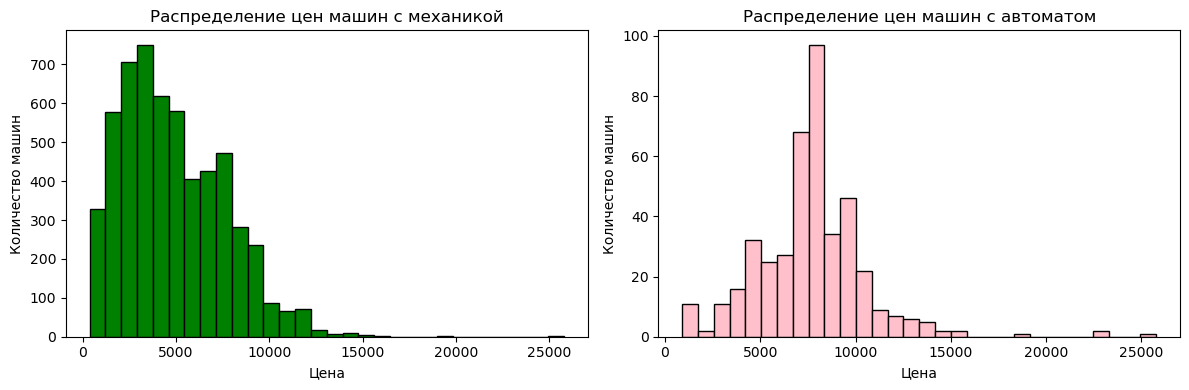

In [113]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
 
axes[0].hist(df[df['transmission']=='Manual']['selling_price'], bins=30, color='Green', edgecolor='black')
axes[0].set_title('Распределение цен машин с механикой')
 
axes[1].hist(df[df['transmission']=='Automatic']['selling_price'], bins=30, color='Pink', edgecolor='black')
axes[1].set_title('Распределение цен машин с автоматом')
 
for ax in axes:
    ax.set_xlabel('Цена')
    ax.set_ylabel('Количество машин')
 
plt.tight_layout()
plt.show()

По графикам можем сделать вывод, что машины с автоматом как правило обладают лучшими характеристиками и, соответственно, стоят дороже.

Теперь рассмотрим **количество владельцев машины до последней продажи**. Этот признак, как и **год выпуска**, должен сильно влиять на цену.

In [114]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

Посмотрим, через сколько владельцев проходили исследуемые машины:

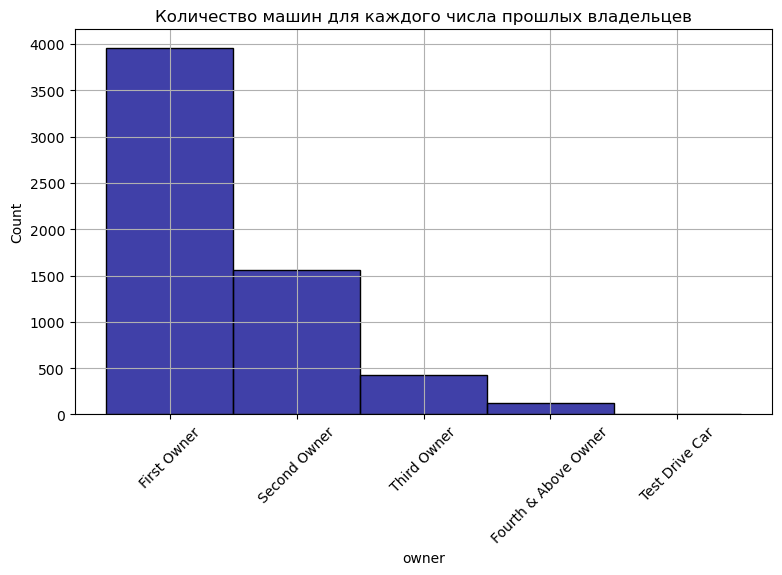

In [115]:
plt.figure(figsize=(9, 5))
df['owner'].value_counts()
sns.histplot(data = df, x = 'owner', color= 'darkblue')
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Количество машин для каждого числа прошлых владельцев')
plt.show()

Абсолютное большинство машин побывали до последней продажи в руках одного или двух владельцев. Значит, год выпуска окажет большее влияние на цену.

Посмотрим также на распределение цен по кодичеству владельцев

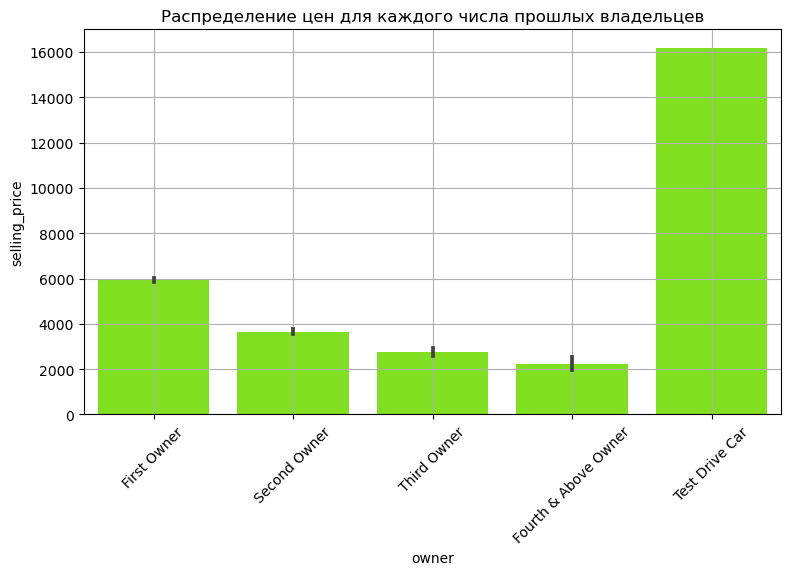

In [116]:
plt.figure(figsize=(9, 5))
df['owner'].value_counts()
sns.barplot(data = df, x = 'owner', y = 'selling_price', color = 'chartreuse')
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Распределение цен для каждого числа прошлых владельцев')
plt.show()

Результат ожидаем. С добавлением каждого водителя цена уменьшается.

Мы решили, что 'возраст' машины легче интерпретировать, поэтому заменили год выпуска на 'возраст':

In [117]:
df['year'] = df['year'].apply(lambda x: 2024 - x)

In [118]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats
0,Maruti Swift Dzire VDI,10,5395.050,145500,Diesel,Individual,Manual,First Owner,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,10,4435.930,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,18,1894.262,140000,Petrol,Individual,Manual,Third Owner,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,14,2697.525,127000,Diesel,Individual,Manual,First Owner,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,17,1558.570,120000,Petrol,Individual,Manual,First Owner,1298.0,88.20,5.0


### Числовые признаки

Построим гистограммы распределения для основных числовых признаков:

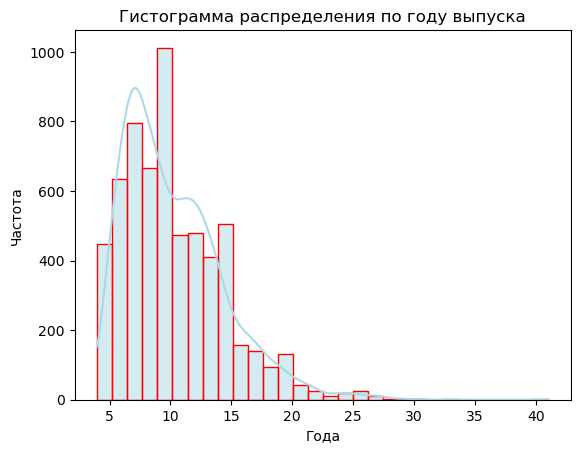

In [119]:
sns.histplot(df['year'], bins=30, kde=True, color='lightblue', edgecolor='red')
 

plt.xlabel('Года')
plt.ylabel('Частота')
plt.title('Гистограмма распределения по году выпуска')
 

plt.show()

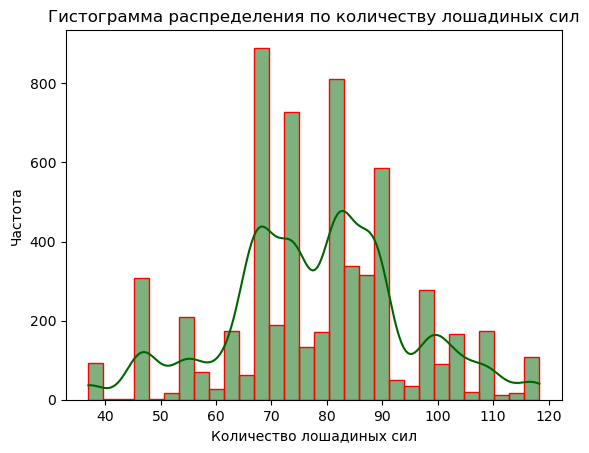

In [120]:
sns.histplot(df['max_power'], bins=30, kde=True, color='darkgreen', edgecolor='red')
 

plt.xlabel('Количество лошадиных сил')
plt.ylabel('Частота')
plt.title('Гистограмма распределения по количеству лошадиных сил')
 

plt.show()

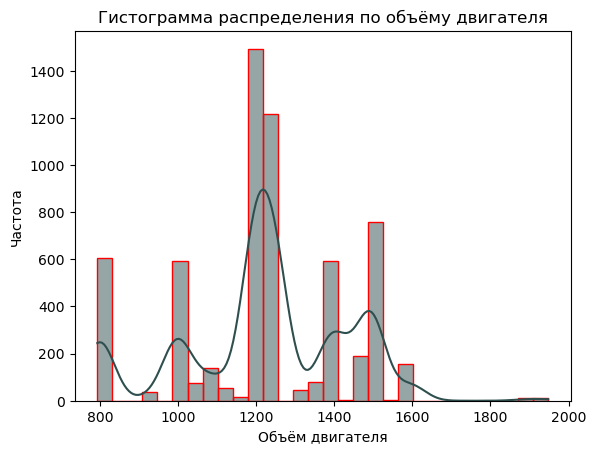

In [121]:
sns.histplot(df['engine'], bins=30, kde=True, color='darkslategrey', edgecolor='red')
 

plt.xlabel('Объём двигателя')
plt.ylabel('Частота')
plt.title('Гистограмма распределения по объёму двигателя')
 

plt.show()

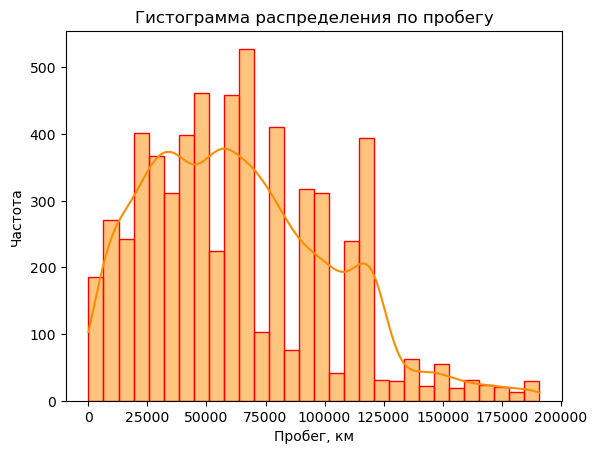

In [122]:
sns.histplot(df['km_driven'], bins=30, kde=True, color='darkorange', edgecolor='red')
 

plt.xlabel('Пробег, км')
plt.ylabel('Частота')
plt.title('Гистограмма распределения по пробегу')
 

plt.show()

### Корреляционный анализ

Построим таблицу корреляций:

In [123]:
df[['selling_price', 'km_driven', 'engine', 'max_power', 'seats', 'year']].corr()

,selling_price,km_driven,engine,max_power,seats,year
selling_price,1.000000,-0.382382,0.369302,0.560318,0.199717,-0.720797
km_driven,-0.382382,1.000000,0.201593,-0.024109,0.035575,0.485436
engine,0.369302,0.201593,1.000000,0.782070,0.222373,-0.079423
max_power,0.560318,-0.024109,0.782070,1.000000,0.192358,-0.268170
seats,0.199717,0.035575,0.222373,0.192358,1.000000,-0.144485
year,-0.720797,0.485436,-0.079423,-0.268170,-0.144485,1.000000


Теперь построим heatmap:

<Axes: >

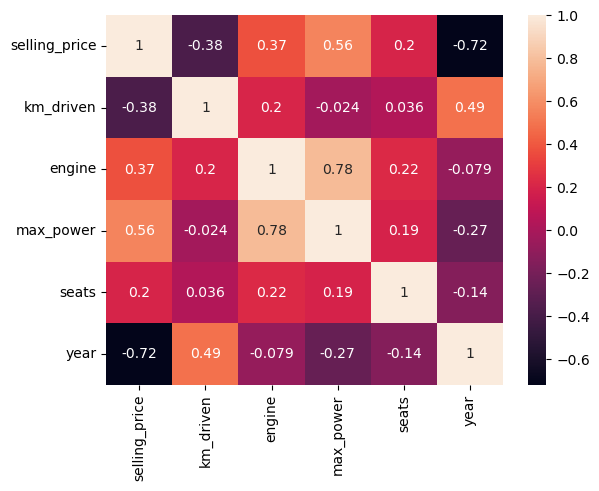

In [124]:
sns.heatmap(df[['selling_price', 'km_driven', 'engine', 'max_power', 'seats', 'year']].corr(), annot = True)

Наибольшее **влияние на цену** оказывают:

1) Возраст машины(высокая теснота связи)
2) Количество лошадиных сил(заметная взаимосвязь)
3) Объём двигателя и пробег (умеренная теснота связи)

Такие результаты ожидаемы. Чаще всего люди, покупающие подержанные машины, обращают в первую очередь внимание на их возраст, так как он влияет на то, сколько машина ещё проживёт. Поэтому возраст больше всего влияет на цену.

Построим на основе данных признаков графики **зависимости цены от них**

Начнём с зависимости **цены от возраста автомобиля**:

[Text(0.5, 1.0, 'Зависимость цен автомобилей от их возраста')]

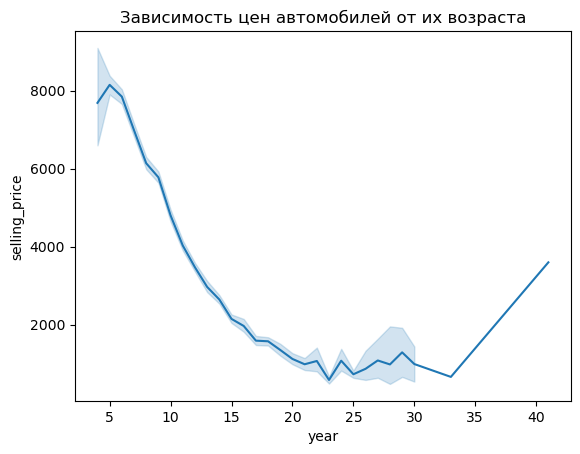

In [125]:
sns.lineplot(data=df, x='year', y='selling_price').set (title='Зависимость цен автомобилей от их возраста')

На участке, где содержится большинство рассматриваемых автомобилей(до 25 лет), тренд явно убывающий, причём зависимость похожа на квадратичную.

Теперь построим аналогичный график для **количества лошадиных сил**:

[Text(0.5, 1.0, 'Зависимость цен автомобилей от количества лошадиных сил')]

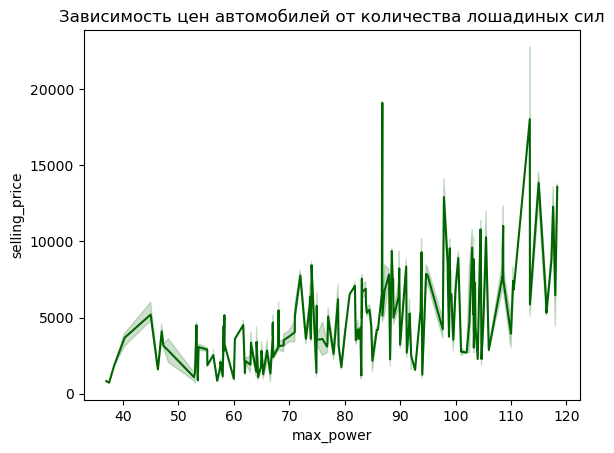

In [126]:
sns.lineplot(data=df, x='max_power', y='selling_price', color='darkgreen').set (title='Зависимость цен автомобилей от количества лошадиных сил')

Здесь заметен возрастающий тренд, но он не такой явный, так как если у одной машины больше лошадиных сил, но она, например, старше другой на 10 лет, то вторая будет стоить дороже.

Построим график для **пробега**:

[Text(0.5, 1.0, 'Зависимость цен автомобилей от пробега')]

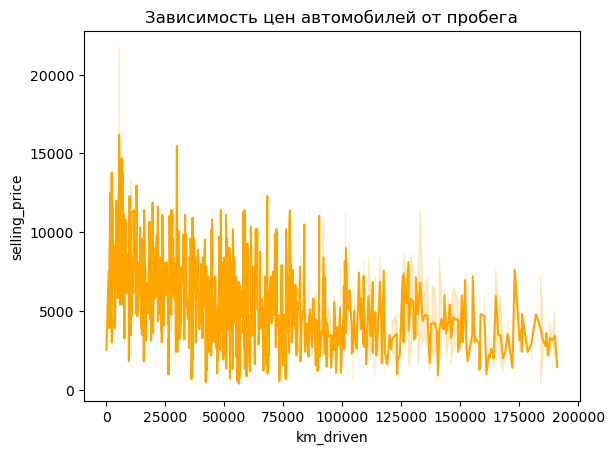

In [127]:
sns.lineplot(data=df, x='km_driven', y='selling_price', color='orange').set (title='Зависимость цен автомобилей от пробега')

Убывающий тренд заметен, причём видно, что большая часть автомобилей имеют пробег до 100000 км.

## Новые признаки

В процессе анализа датасета нам пришла идея классифицировать автомобили на автомобили масс-маркет и бюджетные.

Мы выбрали такую классификацию, так как в данном датасете нет дорогих, премиальных автомобилей. Мощность лучшей машины = 125 лошадиных сил.

Проанализировав рынок автомобилей, мы решили, что к масс-маркет условно относятся автомобили с количеством лошадиных сил >=100 и объёмом двигателя >=1400.

Создадим новый категориальный столбец:

In [128]:
df['Class'] = df.apply(lambda row: 'Mass market' if (row.engine >=1400 and row.max_power >=10) else 'Cheap' , axis = 1)
 
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats,Class
0,Maruti Swift Dzire VDI,10,5395.050,145500,Diesel,Individual,Manual,First Owner,1248.0,74.00,5.0,Cheap
1,Skoda Rapid 1.5 TDI Ambition,10,4435.930,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0,Mass market
2,Honda City 2017-2020 EXi,18,1894.262,140000,Petrol,Individual,Manual,Third Owner,1497.0,78.00,5.0,Mass market
3,Hyundai i20 Sportz Diesel,14,2697.525,127000,Diesel,Individual,Manual,First Owner,1396.0,90.00,5.0,Cheap
4,Maruti Swift VXI BSIII,17,1558.570,120000,Petrol,Individual,Manual,First Owner,1298.0,88.20,5.0,Cheap


In [129]:
df.loc[df['Class'] == 'Cheap', 'selling_price'].mean()

4736.297236749019

In [130]:
df.loc[df['Class'] == 'Mass market', 'selling_price'].mean()

6237.56611118123

Рассчитав среднее для обоих категорий, видим, что цены между этими классами действительно сильно различаются.

## Планы по проверке гипотез

Будем считать, что цены автомобилей **независимы**. Также заметим, что у нас в наличии большое число наблюдений, следовательно, мы можем пользоваться тем, что среднее значение какого-либо признака будет распределено асимптотически нормально. Наконец, установим уровень значимости 0.05
 для каждой проверки.

**Гипотеза 1**: Автомобили на газовом топливе в  среднем стоят дороже на 10% и более.

**Гипотеза 2**: Цена автомобилей, которым от 5 до 20 лет, имеет квадратичную зависимосьть от возраста автомобиля.

**Гипотеза 3**: Самые современные автомобили (новее 2018 года включительно) имеют сравнимый или больший средний объем двигателя, чем автомобили старее.

## Планы по машинному обучению

Основная наша цель в блоке машинного обучения - построить модель, которая хорошо будет предсказывать **цену машины по её характеристикам.**

Скорее всего, это будет **линейная регрессия**.

Такая модель может быть полезна автодилерам, онлайн-сервисам по продаже автомобилей.

In [131]:
#линейная регрессия с имеющимися данными:

In [146]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats,Class,Fuel,Seller_type,Transmission,Owner,CLASS
0,Maruti Swift Dzire VDI,10,5395.050,145500,Diesel,Individual,Manual,First Owner,1248.0,74.00,5.0,Cheap,Diesel,Individual,Manual,First Owner,Cheap
1,Skoda Rapid 1.5 TDI Ambition,10,4435.930,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0,Mass market,Diesel,Individual,Manual,Second Owner,Mass market
2,Honda City 2017-2020 EXi,18,1894.262,140000,Petrol,Individual,Manual,Third Owner,1497.0,78.00,5.0,Mass market,Petrol,Individual,Manual,Third Owner,Mass market
3,Hyundai i20 Sportz Diesel,14,2697.525,127000,Diesel,Individual,Manual,First Owner,1396.0,90.00,5.0,Cheap,Diesel,Individual,Manual,First Owner,Cheap
4,Maruti Swift VXI BSIII,17,1558.570,120000,Petrol,Individual,Manual,First Owner,1298.0,88.20,5.0,Cheap,Petrol,Individual,Manual,First Owner,Cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,11,3836.480,110000,Petrol,Individual,Manual,First Owner,1197.0,82.85,5.0,Cheap,Petrol,Individual,Manual,First Owner,Cheap
8124,Hyundai Verna CRDi SX,17,1618.515,119000,Diesel,Individual,Manual,Fourth & Above Owner,1493.0,110.00,5.0,Mass market,Diesel,Individual,Manual,Fourth & Above Owner,Mass market
8125,Maruti Swift Dzire ZDi,15,4579.798,120000,Diesel,Individual,Manual,First Owner,1248.0,73.90,5.0,Cheap,Diesel,Individual,Manual,First Owner,Cheap
8126,Tata Indigo CR4,11,3476.810,25000,Diesel,Individual,Manual,First Owner,1396.0,70.00,5.0,Cheap,Diesel,Individual,Manual,First Owner,Cheap


In [147]:
# кодировка признаков

In [148]:
df[['Fuel', 'Seller_type', 'Transmission', 'Owner', 'CLASS']] = df[['fuel', 'seller_type', 'transmission', 'owner', 'Class']]
df_mod = pd.get_dummies(df, columns=['Fuel', 'Seller_type', 'Transmission', 'Owner', 'CLASS'], drop_first=True, dtype=int)
df_mod.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,...,Fuel_LPG,Fuel_Petrol,Seller_type_Individual,Seller_type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner,CLASS_Mass market
0,Maruti Swift Dzire VDI,10,5395.050,145500,Diesel,Individual,Manual,First Owner,1248.0,74.00,...,0,0,1,0,1,0,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,10,4435.930,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,...,0,0,1,0,1,0,1,0,0,1
2,Honda City 2017-2020 EXi,18,1894.262,140000,Petrol,Individual,Manual,Third Owner,1497.0,78.00,...,0,1,1,0,1,0,0,0,1,1
3,Hyundai i20 Sportz Diesel,14,2697.525,127000,Diesel,Individual,Manual,First Owner,1396.0,90.00,...,0,0,1,0,1,0,0,0,0,0
4,Maruti Swift VXI BSIII,17,1558.570,120000,Petrol,Individual,Manual,First Owner,1298.0,88.20,...,0,1,1,0,1,0,0,0,0,0


In [149]:
df_mod.isnull().sum()

name                            0
year                            0
selling_price                   0
km_driven                       0
fuel                            0
seller_type                     0
transmission                    0
owner                           0
engine                          0
max_power                       0
seats                           0
Class                           0
Fuel_Diesel                     0
Fuel_LPG                        0
Fuel_Petrol                     0
Seller_type_Individual          0
Seller_type_Trustmark Dealer    0
Transmission_Manual             0
Owner_Fourth & Above Owner      0
Owner_Second Owner              0
Owner_Test Drive Car            0
Owner_Third Owner               0
CLASS_Mass market               0
dtype: int64

В процессе визуализации была выявлена зависимость между возрастом машины и ценой, похожая на **квадратичную**.

Попробуем создать новый признак, **квадрат возраста машины**, возможно, он будет лучше влиять на предсказание цены.

In [150]:
df_mod['year2'] = df_mod.apply(lambda row: (row.year)**2, axis = 1)
 
df_mod.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,...,Fuel_Petrol,Seller_type_Individual,Seller_type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner,CLASS_Mass market,year2
0,Maruti Swift Dzire VDI,10,5395.050,145500,Diesel,Individual,Manual,First Owner,1248.0,74.00,...,0,1,0,1,0,0,0,0,0,100
1,Skoda Rapid 1.5 TDI Ambition,10,4435.930,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,...,0,1,0,1,0,1,0,0,1,100
2,Honda City 2017-2020 EXi,18,1894.262,140000,Petrol,Individual,Manual,Third Owner,1497.0,78.00,...,1,1,0,1,0,0,0,1,1,324
3,Hyundai i20 Sportz Diesel,14,2697.525,127000,Diesel,Individual,Manual,First Owner,1396.0,90.00,...,0,1,0,1,0,0,0,0,0,196
4,Maruti Swift VXI BSIII,17,1558.570,120000,Petrol,Individual,Manual,First Owner,1298.0,88.20,...,1,1,0,1,0,0,0,0,0,289


In [151]:
# разбиение выборки

In [152]:
y = df_mod['selling_price']

In [153]:
y

0       5395.050
1       4435.930
2       1894.262
3       2697.525
4       1558.570
          ...   
8123    3836.480
8124    1618.515
8125    4579.798
8126    3476.810
8127    3476.810
Name: selling_price, Length: 6081, dtype: float64

In [154]:
df_mod

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,...,Fuel_Petrol,Seller_type_Individual,Seller_type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner,CLASS_Mass market,year2
0,Maruti Swift Dzire VDI,10,5395.050,145500,Diesel,Individual,Manual,First Owner,1248.0,74.00,...,0,1,0,1,0,0,0,0,0,100
1,Skoda Rapid 1.5 TDI Ambition,10,4435.930,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,...,0,1,0,1,0,1,0,0,1,100
2,Honda City 2017-2020 EXi,18,1894.262,140000,Petrol,Individual,Manual,Third Owner,1497.0,78.00,...,1,1,0,1,0,0,0,1,1,324
3,Hyundai i20 Sportz Diesel,14,2697.525,127000,Diesel,Individual,Manual,First Owner,1396.0,90.00,...,0,1,0,1,0,0,0,0,0,196
4,Maruti Swift VXI BSIII,17,1558.570,120000,Petrol,Individual,Manual,First Owner,1298.0,88.20,...,1,1,0,1,0,0,0,0,0,289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,11,3836.480,110000,Petrol,Individual,Manual,First Owner,1197.0,82.85,...,1,1,0,1,0,0,0,0,0,121
8124,Hyundai Verna CRDi SX,17,1618.515,119000,Diesel,Individual,Manual,Fourth & Above Owner,1493.0,110.00,...,0,1,0,1,1,0,0,0,1,289
8125,Maruti Swift Dzire ZDi,15,4579.798,120000,Diesel,Individual,Manual,First Owner,1248.0,73.90,...,0,1,0,1,0,0,0,0,0,225
8126,Tata Indigo CR4,11,3476.810,25000,Diesel,Individual,Manual,First Owner,1396.0,70.00,...,0,1,0,1,0,0,0,0,0,121


In [159]:
list(df_mod)

['name',
 'year',
 'selling_price',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'engine',
 'max_power',
 'seats',
 'Class',
 'Fuel_Diesel',
 'Fuel_LPG',
 'Fuel_Petrol',
 'Seller_type_Individual',
 'Seller_type_Trustmark Dealer',
 'Transmission_Manual',
 'Owner_Fourth & Above Owner',
 'Owner_Second Owner',
 'Owner_Test Drive Car',
 'Owner_Third Owner',
 'CLASS_Mass market',
 'year2']

In [162]:
X = df_mod[[
 'year',
 'km_driven',
 'engine',
 'max_power',
 'seats',
 'Fuel_Diesel',
 'Fuel_LPG',
 'Fuel_Petrol',
 'Seller_type_Individual',
 'Seller_type_Trustmark Dealer',
 'Transmission_Manual',
 'Owner_Fourth & Above Owner',
 'Owner_Second Owner',
 'Owner_Test Drive Car',
 'Owner_Third Owner',
 'CLASS_Mass market',
 'year2']]

In [163]:
X.head()

,year,km_driven,engine,max_power,seats,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Seller_type_Individual,Seller_type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner,CLASS_Mass market,year2
0,10,145500,1248.0,74.00,5.0,1,0,0,1,0,1,0,0,0,0,0,100
1,10,120000,1498.0,103.52,5.0,1,0,0,1,0,1,0,1,0,0,1,100
2,18,140000,1497.0,78.00,5.0,0,0,1,1,0,1,0,0,0,1,1,324
3,14,127000,1396.0,90.00,5.0,1,0,0,1,0,1,0,0,0,0,0,196
4,17,120000,1298.0,88.20,5.0,0,0,1,1,0,1,0,0,0,0,0,289


In [164]:
X

,year,km_driven,engine,max_power,seats,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Seller_type_Individual,Seller_type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner,CLASS_Mass market,year2
0,10,145500,1248.0,74.00,5.0,1,0,0,1,0,1,0,0,0,0,0,100
1,10,120000,1498.0,103.52,5.0,1,0,0,1,0,1,0,1,0,0,1,100
2,18,140000,1497.0,78.00,5.0,0,0,1,1,0,1,0,0,0,1,1,324
3,14,127000,1396.0,90.00,5.0,1,0,0,1,0,1,0,0,0,0,0,196
4,17,120000,1298.0,88.20,5.0,0,0,1,1,0,1,0,0,0,0,0,289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,11,110000,1197.0,82.85,5.0,0,0,1,1,0,1,0,0,0,0,0,121
8124,17,119000,1493.0,110.00,5.0,1,0,0,1,0,1,1,0,0,0,1,289
8125,15,120000,1248.0,73.90,5.0,1,0,0,1,0,1,0,0,0,0,0,225
8126,11,25000,1396.0,70.00,5.0,1,0,0,1,0,1,0,0,0,0,0,121


In [165]:
#линрег

In [166]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [167]:
X_train

,year,km_driven,engine,max_power,seats,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Seller_type_Individual,Seller_type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner,CLASS_Mass market,year2
3446,16,40000,1197.0,78.90,5.0,0,0,1,1,0,1,0,0,0,0,0,256
1242,5,15000,1197.0,81.86,5.0,0,0,1,1,0,1,0,0,0,0,0,25
3385,8,20000,1405.0,69.01,5.0,1,0,0,1,0,1,0,0,0,0,1,64
153,13,49000,1598.0,103.60,5.0,0,0,1,1,0,1,0,0,0,0,1,169
8088,6,25000,998.0,67.04,5.0,0,0,1,1,0,1,0,1,0,0,0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078,9,70000,1248.0,74.00,5.0,1,0,0,1,0,1,0,1,0,0,0,81
6938,8,70000,1498.0,99.00,5.0,1,0,0,1,0,1,0,0,0,0,1,64
6992,13,70000,1197.0,80.00,5.0,0,0,1,1,0,1,0,0,0,0,0,169
7209,19,70000,998.0,67.10,5.0,0,0,1,1,0,1,0,1,0,0,0,361


In [169]:
from sklearn.linear_model import LinearRegression


y_train = np.array(y_train).reshape(-1, 1)


lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [170]:
y_test_pred = lin_model.predict(X_test) #ищем предсказанные значения

In [171]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_test_pred)

2218942.11916609

In [172]:
from sklearn.metrics import r2_score
 
r2_score(y_test, y_test_pred)

0.7281022075497046

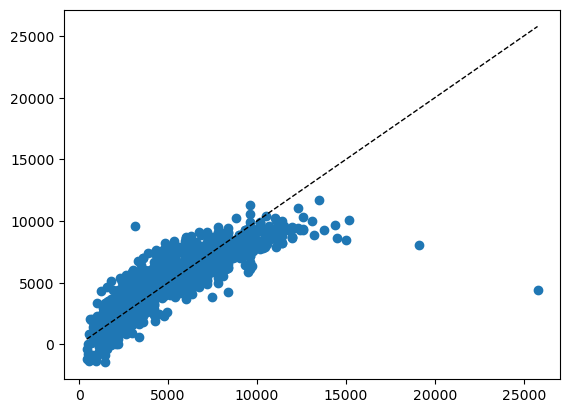

In [176]:

plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw = 1)
#plt.set_title('Actual vs. Predicted', fontsize = 14)
#plt.set(xlabel = 'y_true')
#plt.set(ylabel = 'y_pred')

In [177]:
# Функция для того, чтобы на одной картинке смотреть те графики с прогнозами.
def plot_yreal_ypred(y_test, y_train, y_test_pred):
    """
        Рисует картинку для прогнозов регрессии 
    """
    
    margin = 0.1 # отступ на границах
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.scatter(y_train, y_train, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    train_min = min(y_train)
    train_max = max(y_train)
    plt.xlim(train_min - margin, train_max + margin)
    plt.ylim(train_min - margin, train_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Train set', fontsize=20)

    plt.subplot(122)
    plt.scatter(y_test, y_test_pred, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    test_min = min(y_test)
    test_max = max(y_test)
    plt.xlim(test_min - margin, test_max + margin)
    plt.ylim(test_min - margin, test_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Test set', fontsize=20)
    pass

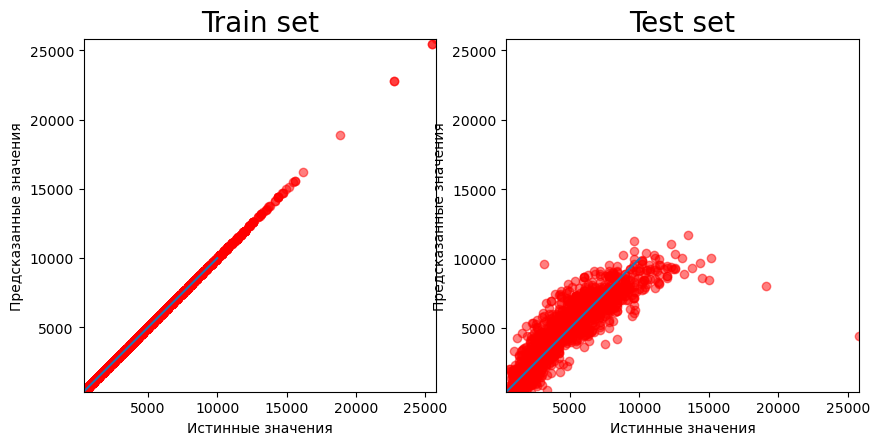

In [178]:
plot_yreal_ypred(y_test, y_train, y_test_pred)

Теперь попробуем посмотреть на корреляции и обучить регрессию только с признаками, обладающими достаточно высокой корреляцией с таргетом:

In [180]:
X_crucial = df_mod[[
 'year',
 'km_driven',
 'engine',
 'max_power',
 'Fuel_Diesel',
 'Fuel_LPG',
 'Fuel_Petrol',
 'Transmission_Manual',
 'year2']]

In [181]:
Xcru_train, Xcru_test, ycru_train, ycru_test = train_test_split(X_crucial, y, train_size=0.8, random_state=42)

In [182]:
ycru_train = np.array(y_train).reshape(-1, 1)


lin_model_cru = LinearRegression()
lin_model_cru.fit(Xcru_train, ycru_train)

LinearRegression()

In [184]:
y_test_pred_cru = lin_model_cru.predict(Xcru_test) #ищем предсказанные значения

In [185]:
from sklearn.metrics import mean_squared_error

mean_squared_error(ycru_test, y_test_pred_cru)

2245602.6686583264

In [186]:
r2_score(ycru_test, y_test_pred_cru)

0.7248353604833307

**Вторая модель чуть хуже предсказывает цену**

Попробуем применить Лассо-регрессию:

In [187]:
from sklearn.linear_model import Lasso

from sklearn. linear_model import LassoCV
from sklearn. model_selection import RepeatedKFold


#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits= 10 , n_repeats= 3 , random_state= 1 )

#define model
model_lasso = Lasso(alpha= 40)

#fit model
model_lasso.fit(X_train, y_train)

#display lambda that produced the lowest test MSE
print(model_lasso. alpha)



40


In [188]:
y_test_pred_lasso = model_lasso.predict(X_test) #ищем предсказанные значения
mean_squared_error(y_test, y_test_pred_lasso)

2252884.03938743

In [189]:
y_test_pred_lasso_list = y_test_pred_lasso.tolist()
y_test_pred_lasso_list = np.array(y_test_pred_lasso_list)

In [190]:
print(f'R2 у Лассо-регрессии = {r2_score(y_test, y_test_pred_lasso)}')

R2 у Лассо-регрессии = 0.7239431386402484


Лучшей моделью судя по R^2 оказалась **первая модель**.

Посмотрим на ее коэффициенты:

In [200]:
coef_lin_model = lin_model.coef_

In [201]:
features_first = [
 'year',
 'km_driven',
 'engine',
 'max_power',
 'seats',
 'Fuel_Diesel',
 'Fuel_LPG',
 'Fuel_Petrol',
 'Seller_type_Individual',
 'Seller_type_Trustmark Dealer',
 'Transmission_Manual',
 'Owner_Fourth & Above Owner',
 'Owner_Second Owner',
 'Owner_Test Drive Car',
 'Owner_Third Owner',
 'CLASS_Mass market',
 'year2']

Попробуем обучить Лассо регрессию с подбором альфа:

In [210]:
cv2 = RepeatedKFold(n_splits= 10 , n_repeats= 3 , random_state= 1 )

#define model
model_lasso2 = LassoCV(alphas= np.arange(0, 1, 0.01), cv=cv2, n_jobs=-1)

#fit model
model_lasso2.fit(X_train, y_train)

#display lambda that produced the lowest test MSE
print(model_lasso2.alpha_ )

0.39


In [211]:
y_test_pred_lasso2 = model_lasso2.predict(X_test) #ищем предсказанные значения
mean_squared_error(y_test, y_test_pred_lasso2)

2219257.391484938

In [212]:
print(f'R2 у Лассо-регрессии с подбором альфа = {r2_score(y_test, y_test_pred_lasso2)}')

R2 у Лассо-регрессии с подбором альфа = 0.7280635756959148


Все равно самая первая модель чуть лучше  

Попробуем сделать всё как в первой модели, но убрать year, оставив только year2:

In [213]:
X_year2 = df_mod[[
 'km_driven',
 'engine',
 'max_power',
 'seats',
 'Fuel_Diesel',
 'Fuel_LPG',
 'Fuel_Petrol',
 'Seller_type_Individual',
 'Seller_type_Trustmark Dealer',
 'Transmission_Manual',
 'Owner_Fourth & Above Owner',
 'Owner_Second Owner',
 'Owner_Test Drive Car',
 'Owner_Third Owner',
 'CLASS_Mass market',
 'year2']]

In [214]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_year2, y, train_size=0.8, random_state=42)

In [215]:
y_train2 = np.array(y_train).reshape(-1, 1)


lin_model2 = LinearRegression()
lin_model2.fit(X_train2, y_train2)

LinearRegression()

In [216]:
y_test_pred2 = lin_model2.predict(X_test2) #ищем предсказанные значения

In [217]:
mean_squared_error(y_test2, y_test_pred2)

2782934.455254793

In [218]:
r2_score(y_test2, y_test_pred2)

0.6589934778460952

Стало хуже. Значит, останавливаемся на **первой модели.**

Также мы попробовали обучить модели без очистки от выбросов, но качество получилось хуже. Это можно увидеть в файле LinReg2

# Проверка гипотез

**1.Автомобили на газовом топливе в среднем стоят дороже на 10% и более.**

Проверим эту гипотезу с помощью ttest из библиотеки SciPy.

Для этого создадим массивы из цен автомобилей на газовом и обычном топливе, затем умножим цены из второго массива на 1.1 и сравним математические ожидания.

In [219]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats,Class,Fuel,Seller_type,Transmission,Owner,CLASS
0,Maruti Swift Dzire VDI,10,5395.050,145500,Diesel,Individual,Manual,First Owner,1248.0,74.00,5.0,Cheap,Diesel,Individual,Manual,First Owner,Cheap
1,Skoda Rapid 1.5 TDI Ambition,10,4435.930,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0,Mass market,Diesel,Individual,Manual,Second Owner,Mass market
2,Honda City 2017-2020 EXi,18,1894.262,140000,Petrol,Individual,Manual,Third Owner,1497.0,78.00,5.0,Mass market,Petrol,Individual,Manual,Third Owner,Mass market
3,Hyundai i20 Sportz Diesel,14,2697.525,127000,Diesel,Individual,Manual,First Owner,1396.0,90.00,5.0,Cheap,Diesel,Individual,Manual,First Owner,Cheap
4,Maruti Swift VXI BSIII,17,1558.570,120000,Petrol,Individual,Manual,First Owner,1298.0,88.20,5.0,Cheap,Petrol,Individual,Manual,First Owner,Cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,11,3836.480,110000,Petrol,Individual,Manual,First Owner,1197.0,82.85,5.0,Cheap,Petrol,Individual,Manual,First Owner,Cheap
8124,Hyundai Verna CRDi SX,17,1618.515,119000,Diesel,Individual,Manual,Fourth & Above Owner,1493.0,110.00,5.0,Mass market,Diesel,Individual,Manual,Fourth & Above Owner,Mass market
8125,Maruti Swift Dzire ZDi,15,4579.798,120000,Diesel,Individual,Manual,First Owner,1248.0,73.90,5.0,Cheap,Diesel,Individual,Manual,First Owner,Cheap
8126,Tata Indigo CR4,11,3476.810,25000,Diesel,Individual,Manual,First Owner,1396.0,70.00,5.0,Cheap,Diesel,Individual,Manual,First Owner,Cheap


In [225]:
#df_gas = df[df['Fuel'] == ['LPG', 'CNG']]
df_gas = df.loc[(df['Fuel'] == 'LPG') |(df['Fuel'] == 'CNG')]
#df_oil = df[df['Fuel'] == 'Petrol' and df['Fuel'] == 'Diesel'] 


In [226]:
df_gas

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats,Class,Fuel,Seller_type,Transmission,Owner,CLASS
6,Maruti Wagon R LXI DUO BSIII,17,1150.944000,175000,LPG,Individual,Manual,First Owner,1061.0,57.50,5.0,Cheap,LPG,Individual,Manual,First Owner,Cheap
35,Maruti Alto 800 CNG LXI Optional,5,3956.370000,10000,CNG,Individual,Manual,Second Owner,796.0,40.30,4.0,Cheap,CNG,Individual,Manual,Second Owner,Cheap
90,Maruti Wagon R LXI LPG BSIV,14,2697.525000,44000,LPG,Dealer,Manual,First Owner,998.0,58.20,5.0,Cheap,LPG,Dealer,Manual,First Owner,Cheap
203,Maruti Wagon R LXI CNG,8,4316.040000,50000,CNG,Individual,Manual,First Owner,998.0,58.16,5.0,Cheap,CNG,Individual,Manual,First Owner,Cheap
402,Maruti Eeco CNG 5 Seater AC,4,4915.478011,35000,CNG,Individual,Manual,First Owner,1196.0,61.70,5.0,Cheap,CNG,Individual,Manual,First Owner,Cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7308,Maruti Alto Green LXi (CNG),14,1858.295000,70000,CNG,Individual,Manual,Second Owner,796.0,38.40,5.0,Cheap,CNG,Individual,Manual,Second Owner,Cheap
7543,Maruti Alto 800 CNG LXI Optional,5,3956.370000,10000,CNG,Individual,Manual,Second Owner,796.0,40.30,4.0,Cheap,CNG,Individual,Manual,Second Owner,Cheap
7642,Chevrolet Spark 1.0 LT LPG,12,3596.700000,70000,LPG,Individual,Manual,First Owner,995.0,60.20,5.0,Cheap,LPG,Individual,Manual,First Owner,Cheap
7733,Maruti Eeco CNG 5 Seater AC BSIV,9,4555.820000,20000,CNG,Individual,Manual,First Owner,1196.0,61.70,5.0,Cheap,CNG,Individual,Manual,First Owner,Cheap


In [227]:
df_oil = df.loc[(df['Fuel'] == 'Petrol') |(df['Fuel'] == 'Diesel')]

In [228]:
gas_prices = df_gas['selling_price']

In [230]:
gas_prices = list(gas_prices)

In [233]:
oil_prices = df_oil['selling_price']
oil_prices = list(oil_prices)

oil_prices_11 = [price*1.1 for price in oil_prices]

In [234]:
from scipy import stats


stats. ttest_ind (gas_prices, oil_prices_11, equal_var = False )

Ttest_indResult(statistic=-16.229358598307215, pvalue=2.584918295006021e-30)

In [240]:
stats. ttest_ind (gas_prices, oil_prices_11, equal_var = False )[1] < 0.05

True

p-value < уровня значимости, значит **H0 отвергается**

**2. Самые современные автомобили (новее 2018 года включительно) имеют такой же средний объем двигателя, как автомобили старее.**

**H0**: Мат ожидание от объема двигателя автомобилей после 2018 года = Мат ожидание автомобилей до 2018 года

**H1**: Мат ожидание от объема двигателя автомобилей после 2018 года > Мат ожидание автомобилей до 2018 года

In [241]:
df_fresh = df.loc[(df['year'] <= 6)]

In [243]:
df_arch = df.loc[(df['year'] > 6)]

In [245]:
fresh_prices = df_fresh['selling_price']

arch_prices = df_arch['selling_price']

In [246]:
fresh_prices = list(fresh_prices)
arch_prices = list(arch_prices)

In [247]:
stats. ttest_ind (fresh_prices, arch_prices, equal_var = False, alternative='greater')

Ttest_indResult(statistic=40.40677716186289, pvalue=4.595353755021326e-244)

In [248]:
p_value_2018 = stats. ttest_ind (fresh_prices, arch_prices, equal_var = False, alternative='greater')[1]

In [254]:
p_value_2018 < 0.5

True

**H0 отвергается** на уровне значимости 5% 

**3. Цена автомобилей, которым от 5 до 20 лет, имеет квадратичную зависимость от возраста автомобиля.**

Эту гипотезу проверим графически. Построим график зависимости для автомобилей от 5 до 20 лет и сравним его с параболами с разными коэффициентами.

In [255]:
df_5_20 = df.loc[(df['year'] >= 5) & (df['year'] <= 20)]

In [256]:
df_5_20

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats,Class,Fuel,Seller_type,Transmission,Owner,CLASS
0,Maruti Swift Dzire VDI,10,5395.050,145500,Diesel,Individual,Manual,First Owner,1248.0,74.00,5.0,Cheap,Diesel,Individual,Manual,First Owner,Cheap
1,Skoda Rapid 1.5 TDI Ambition,10,4435.930,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0,Mass market,Diesel,Individual,Manual,Second Owner,Mass market
2,Honda City 2017-2020 EXi,18,1894.262,140000,Petrol,Individual,Manual,Third Owner,1497.0,78.00,5.0,Mass market,Petrol,Individual,Manual,Third Owner,Mass market
3,Hyundai i20 Sportz Diesel,14,2697.525,127000,Diesel,Individual,Manual,First Owner,1396.0,90.00,5.0,Cheap,Diesel,Individual,Manual,First Owner,Cheap
4,Maruti Swift VXI BSIII,17,1558.570,120000,Petrol,Individual,Manual,First Owner,1298.0,88.20,5.0,Cheap,Petrol,Individual,Manual,First Owner,Cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,11,3836.480,110000,Petrol,Individual,Manual,First Owner,1197.0,82.85,5.0,Cheap,Petrol,Individual,Manual,First Owner,Cheap
8124,Hyundai Verna CRDi SX,17,1618.515,119000,Diesel,Individual,Manual,Fourth & Above Owner,1493.0,110.00,5.0,Mass market,Diesel,Individual,Manual,Fourth & Above Owner,Mass market
8125,Maruti Swift Dzire ZDi,15,4579.798,120000,Diesel,Individual,Manual,First Owner,1248.0,73.90,5.0,Cheap,Diesel,Individual,Manual,First Owner,Cheap
8126,Tata Indigo CR4,11,3476.810,25000,Diesel,Individual,Manual,First Owner,1396.0,70.00,5.0,Cheap,Diesel,Individual,Manual,First Owner,Cheap


In [262]:
df_5_20['year2'] = df_5_20.apply(lambda row: (row.year)**2, axis = 1)
 
df_5_20.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats,Class,Fuel,Seller_type,Transmission,Owner,CLASS,year2
0,Maruti Swift Dzire VDI,10,5395.050,145500,Diesel,Individual,Manual,First Owner,1248.0,74.00,5.0,Cheap,Diesel,Individual,Manual,First Owner,Cheap,100
1,Skoda Rapid 1.5 TDI Ambition,10,4435.930,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0,Mass market,Diesel,Individual,Manual,Second Owner,Mass market,100
2,Honda City 2017-2020 EXi,18,1894.262,140000,Petrol,Individual,Manual,Third Owner,1497.0,78.00,5.0,Mass market,Petrol,Individual,Manual,Third Owner,Mass market,324
3,Hyundai i20 Sportz Diesel,14,2697.525,127000,Diesel,Individual,Manual,First Owner,1396.0,90.00,5.0,Cheap,Diesel,Individual,Manual,First Owner,Cheap,196
4,Maruti Swift VXI BSIII,17,1558.570,120000,Petrol,Individual,Manual,First Owner,1298.0,88.20,5.0,Cheap,Petrol,Individual,Manual,First Owner,Cheap,289


[Text(0.5, 1.0, 'Зависимость цен автомобилей от их (возраста)^2')]

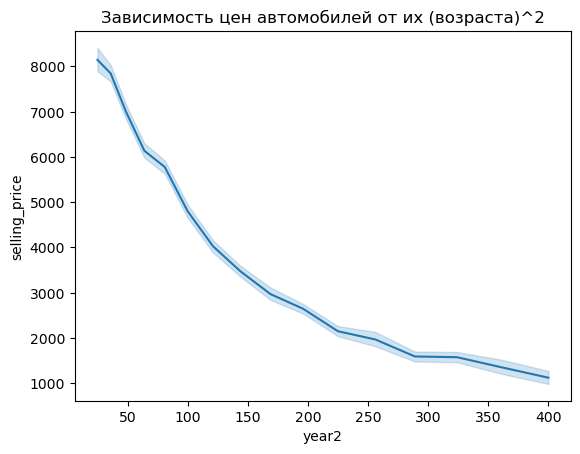

In [263]:
sns.lineplot(data=df_5_20, x='year2', y='selling_price').set (title='Зависимость цен автомобилей от их (возраста)^2')

[Text(0.5, 1.0, 'Зависимость цен автомобилей от их (возраста)^2')]

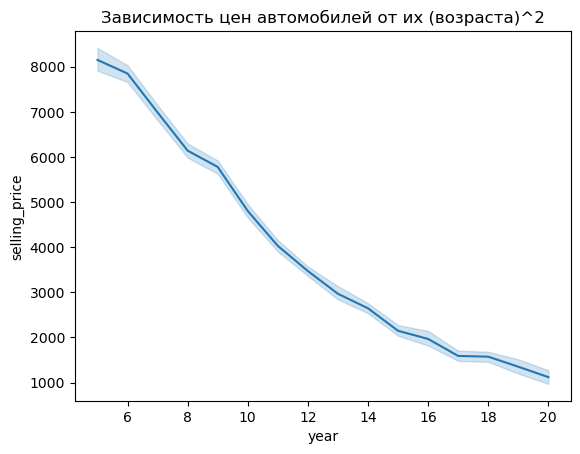

In [264]:
sns.lineplot(data=df_5_20, x='year', y='selling_price').set (title='Зависимость цен автомобилей от их (возраста)^2')

На самом деле гипотеза отвергается, так как зависимость цены от возраста машиын больше похожа на линейную чем цены от возраста^2